In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Иницилизация

In [95]:
a,b = 0,1
n = 100
t = np.linspace(a,b,n)
s = np.linspace(a,b,n)
x = np.linspace(a,b,n)
alpha = 1e-6
eps = 0.001
q = 1
p = 1
right_side = np.full(n,np.NAN)
left_side = np.full((n,n),np.NAN)
real_one = np.full(n,np.NAN)
A = np.ones(n)
A[0],A[n - 1] = 0.5,0.5
h = (b - a) / (n - 1)

In [96]:
for i in range(n):
    real_one[i] = np.sin(x[i])

In [97]:
real_one

array([0.        , 0.01010084, 0.02020065, 0.03029839, 0.04039305,
       0.05048358, 0.06056897, 0.07064817, 0.08072016, 0.09078392,
       0.10083842, 0.11088263, 0.12091552, 0.13093608, 0.14094328,
       0.1509361 , 0.16091352, 0.17087452, 0.18081808, 0.1907432 ,
       0.20064886, 0.21053404, 0.22039774, 0.23023896, 0.24005668,
       0.24984992, 0.25961766, 0.26935891, 0.27907268, 0.28875797,
       0.2984138 , 0.30803919, 0.31763315, 0.3271947 , 0.33672286,
       0.34621667, 0.35567516, 0.36509735, 0.3744823 , 0.38382904,
       0.39313661, 0.40240408, 0.41163048, 0.42081489, 0.42995636,
       0.43905397, 0.44810678, 0.45711386, 0.46607431, 0.47498721,
       0.48385164, 0.49266671, 0.5014315 , 0.51014514, 0.51880673,
       0.52741539, 0.53597023, 0.54447039, 0.55291499, 0.56130318,
       0.56963411, 0.57790691, 0.58612075, 0.59427479, 0.60236819,
       0.61040014, 0.6183698 , 0.62627638, 0.63411905, 0.64189703,
       0.64960951, 0.65725572, 0.66483486, 0.67234618, 0.67978

In [98]:
A

array([0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5])

In [99]:
left_side

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [100]:
right_side

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])

Симетризованное ядро интегрального уравнения

In [101]:
def G_star_ts(t: float,s: float):
    if s > t:
        return (1 / (4 * (-np.exp(4) + 2 * np.exp(2) - 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t + np.exp(4 - t - s) * s + np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t + np.exp(s + t) * s + np.exp(s + t) * t - np.exp(2 + s + t) * s - np.exp(2 + s + t) * t - np.exp(s - t) * s + np.exp(s - t) * t - np.exp(t + 4 - s) * s + np.exp(t + 4 - s) * t - np.exp(2 - t - s) * s - np.exp(2 - t - s) * t - np.exp(2 + t - s) + np.exp(4 - t - s) - 3 * np.exp(2 - t + s) - np.exp(s + t) + 3 * np.exp(2 + s + t) + np.exp(s - t) - np.exp(t + 4 - s) + np.exp(2 - t - s))
    else:
        return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t - np.exp(4 - t - s) * s - np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t - np.exp(s + t) * s - np.exp(s + t) * t + np.exp(2 + s + t) * s + np.exp(2 + s + t) * t - np.exp(4 - t + s) * s + np.exp(4 - t + s) * t - np.exp(t - s) * s + np.exp(t - s) * t + np.exp(2 - t - s) * s + np.exp(2 - t - s) * t + 3 * np.exp(2 + t - s) - np.exp(4 - t - s) + np.exp(2 - t + s) + np.exp(s + t) - 3 * np.exp(2 + s + t) + np.exp(4 - t + s) - np.exp(t - s) - np.exp(2 - t - s))

Правая часть (как в первой лабораторной)

In [102]:
def y_star(t: float):
    return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.sin(t) * np.exp(4) + np.sin(1) * t * np.exp(3 + t) + np.sin(1) * t * np.exp(3 - t) - np.sin(1) * t * np.exp(1 + t) - np.sin(1) * t * np.exp(1 - t) - np.sin(t) * 2 * np.exp(2) - np.sin(1) * 2 * np.exp(3 + t) + np.sin(1) * 2 * np.exp(3 - t) + np.sin(t))
def y_star1(t: float):
    return (1 / (-2 * np.exp(4) + 4 * np.exp(2) - 2)) * (np.sin(1) * (1 + t) * np.exp(-1 * t + 1) + np.sin(1) * (4 * np.exp(2) * t - 2 * np.exp(4) * t + t * np.exp(1 + t) - t * np.exp(3 - t) - t * np.exp(t + 3) - 2 * t - np.exp(1 + t) - 3 * np.exp(3 - t) + 3 * np.exp(t + 3)))

## Ход основного алгоритма

In [103]:
for i in range(n):
    right_side[i] = y_star(t[i]) - y_star1(t[i])
    

In [104]:
for i in range(1,n-1):
    for j in range(n):
        left_side[i,j] = h * A[j] * G_star_ts(t[i],s[j])

In [105]:
for i in range(1,n-1):
    left_side[i,i] = (alpha * q - (2 * alpha * p) / (h ** 2)) + h * G_star_ts(t[i],s[i]) * A[i]
    left_side[i,i-1] = ((alpha * p) / (h ** 2)) + h * G_star_ts(t[i],s[i]) * A[i]
    left_side[i,i+1] = ((alpha * p) / (h ** 2)) + h * G_star_ts(t[i],s[i]) * A[i]
left_side[0,1:] = 0
left_side[0,0] = 1
left_side[-1,0:-1] = 0
left_side[-1,-1] = 1
right_side[0] = 0
right_side[-1] = 0

In [106]:
right_side

array([0.00000000e+00, 1.59702705e-05, 3.19251272e-05, 4.78491698e-05,
       6.37270247e-05, 7.95433582e-05, 9.52828900e-05, 1.10930406e-04,
       1.26470774e-04, 1.41888951e-04, 1.57170004e-04, 1.72299117e-04,
       1.87261606e-04, 2.02042935e-04, 2.16628724e-04, 2.31004762e-04,
       2.45157025e-04, 2.59071682e-04, 2.72735112e-04, 2.86133915e-04,
       2.99254922e-04, 3.12085209e-04, 3.24612111e-04, 3.36823230e-04,
       3.48706445e-04, 3.60249932e-04, 3.71442164e-04, 3.82271931e-04,
       3.92728346e-04, 4.02800856e-04, 4.12479254e-04, 4.21753689e-04,
       4.30614675e-04, 4.39053100e-04, 4.47060236e-04, 4.54627750e-04,
       4.61747712e-04, 4.68412602e-04, 4.74615318e-04, 4.80349189e-04,
       4.85607977e-04, 4.90385888e-04, 4.94677576e-04, 4.98478155e-04,
       5.01783200e-04, 5.04588758e-04, 5.06891347e-04, 5.08687971e-04,
       5.09976118e-04, 5.10753765e-04, 5.11019388e-04, 5.10771957e-04,
       5.10010950e-04, 5.08736348e-04, 5.06948641e-04, 5.04648830e-04,
      

In [107]:
left_side

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.80129662e-03, -1.96007034e-02,  9.80129662e-03, ...,
         2.74395150e-07,  1.37235315e-07,  3.84618056e-19],
       [ 8.24181548e-20,  9.80215938e-03, -1.95998406e-02, ...,
         5.48639325e-07,  2.74395150e-07,  1.92309028e-19],
       ...,
       [-1.23627232e-19,  2.74395150e-07,  5.48639325e-07, ...,
        -1.95998406e-02,  9.80215938e-03,  1.78572669e-19],
       [ 2.47254464e-19,  1.37235315e-07,  2.74395150e-07, ...,
         9.80129662e-03, -1.96007034e-02,  9.80129662e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [108]:

qq = np.linalg.solve(left_side,right_side) + t * np.sin(1)

## Построение графиков

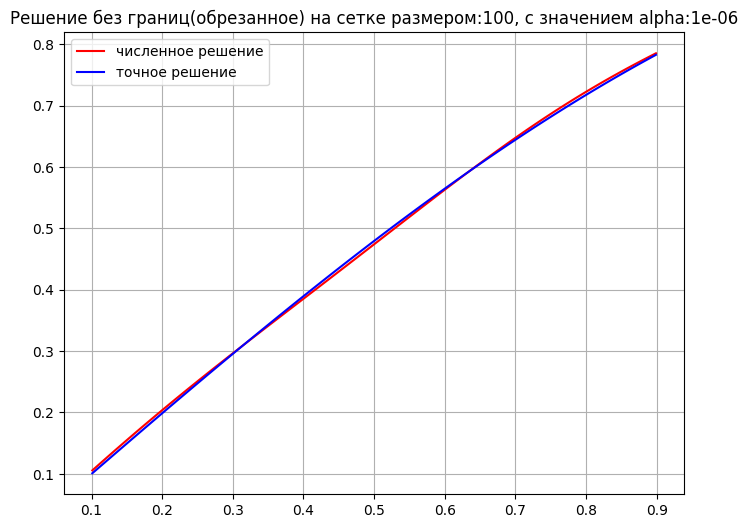

In [109]:
plt.figure(figsize=(8, 6))
plt.title(f'Решение без границ(обрезанное) на сетке размером:{n}, с значением alpha:{alpha}')
plt.plot(x[10:90],qq[10:90],label = 'численное решение',color = 'red')
plt.plot(x[10:90],real_one[10:90],label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

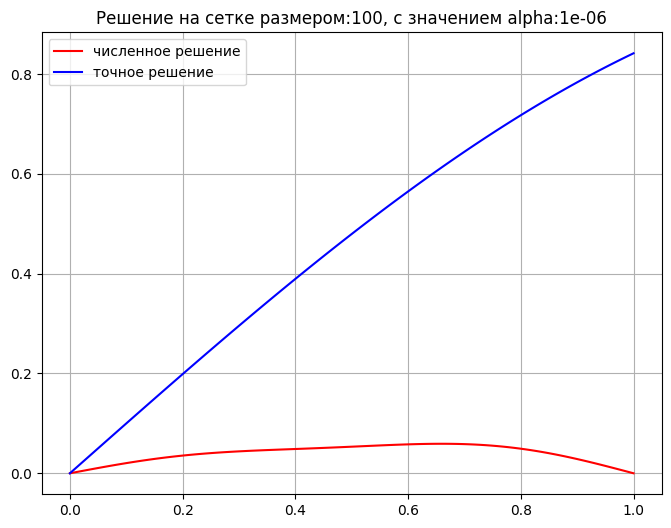

In [60]:
plt.figure(figsize=(8, 6))
plt.title(f'Решение на сетке размером:{n}, с значением alpha:{alpha}')
plt.plot(x,np.linalg.solve(left_side,right_side),label = 'численное решение',color = 'red')
plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

# Анализ коэфициента альфа

In [490]:
%reset -f

In [491]:
import numpy as np
import matplotlib.pyplot as plt

In [492]:
a,b = 0,1
n = 100
t = np.linspace(a,b,n)
s = np.linspace(a,b,n)
x = np.linspace(a,b,n)
alpha = 0.0012739009678923898
eps = 0.01
q = 1
p = 0.5
right_side = np.full(n,np.NAN)
left_side = np.full((n,n),np.NAN)
real_one = np.full(n,np.NAN)
A = np.ones(n)
A[0],A[n - 1] = 0.5,0.5
h = (b - a) / (n - 1)

In [493]:
for i in range(n):
    real_one[i] = np.sin(x[i])

In [494]:
def G_star_ts(t: float,s: float):
    if s > t:
        return (1 / (4 * (-np.exp(4) + 2 * np.exp(2) - 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t + np.exp(4 - t - s) * s + np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t + np.exp(s + t) * s + np.exp(s + t) * t - np.exp(2 + s + t) * s - np.exp(2 + s + t) * t - np.exp(s - t) * s + np.exp(s - t) * t - np.exp(t + 4 - s) * s + np.exp(t + 4 - s) * t - np.exp(2 - t - s) * s - np.exp(2 - t - s) * t - np.exp(2 + t - s) + np.exp(4 - t - s) - 3 * np.exp(2 - t + s) - np.exp(s + t) + 3 * np.exp(2 + s + t) + np.exp(s - t) - np.exp(t + 4 - s) + np.exp(2 - t - s))
    else:
        return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t - np.exp(4 - t - s) * s - np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t - np.exp(s + t) * s - np.exp(s + t) * t + np.exp(2 + s + t) * s + np.exp(2 + s + t) * t - np.exp(4 - t + s) * s + np.exp(4 - t + s) * t - np.exp(t - s) * s + np.exp(t - s) * t + np.exp(2 - t - s) * s + np.exp(2 - t - s) * t + 3 * np.exp(2 + t - s) - np.exp(4 - t - s) + np.exp(2 - t + s) + np.exp(s + t) - 3 * np.exp(2 + s + t) + np.exp(4 - t + s) - np.exp(t - s) - np.exp(2 - t - s))

In [495]:
# def y_star(t: float):
    # return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.sin(t) * np.exp(4) + np.sin(1) * t * np.exp(3 + t) + np.sin(1) * t * np.exp(3 - t) - np.sin(1) * t * np.exp(1 + t) - np.sin(1) * t * np.exp(1 - t) - np.sin(t) * 2 * np.exp(2) - np.sin(1) * 2 * np.exp(3 + t) + np.sin(1) * 2 * np.exp(3 - t) + np.sin(t))
def y_star1(t: float):
    return (1 / (-2 * np.exp(4) + 4 * np.exp(2) - 2)) * (np.sin(1) * (1 + t) * np.exp(-1 * t + 1) + np.sin(1) * (4 * np.exp(2) * t - 2 * np.exp(4) * t + t * np.exp(1 + t) - t * np.exp(3 - t) - t * np.exp(t + 3) - 2 * t - np.exp(1 + t) - 3 * np.exp(3 - t) + 3 * np.exp(t + 3)))

In [496]:
def phi(s: float) -> float:
    # return ((1/2) * (np.exp(s-1) - np.exp(-s + 1))) * np.exp(1) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
        return ((0.5) * (np.exp(s-1) - np.exp(-s + 1)) * np.exp(1)) / (np.exp(2) - 1)

def theta(s: float) -> float:
    # return ((1/2) * (np.exp(s) - np.exp(-s))) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
    return ((0.5) * (np.exp(s) - np.exp(-s)) * np.exp(1)) / (np.exp(2) - 1)

def y(x: float,eps: float) -> float:
    return (1 + eps * (2 * np.random.uniform(0,1,1)[0] - 1)) * (-0.5 * (np.sin(x) * np.exp(2) + np.sin(1) * np.exp(-x + 1) - np.sin(1) * np.exp(x + 1) - np.sin(x))) / (np.exp(2) - 1)
    # return (-0.5 * (np.sin(x) * np.exp(2) + np.sin(1) * np.exp(-x + 1) - np.sin(1) * np.exp(x + 1) - np.sin(x))) / (np.exp(2) - 1)
    # return (1 + eps * (2 * np.random.uniform(0,1,1)[0] - 1)) * (-0.5 * (np.sin(x) * np.exp(2) + np.sin(1) * np.exp(-x + 1) - np.sin(1) * np.exp(x + 1) - np.sin(x))) / (np.exp(2) - 1)
# def y(x: float,eps: float) -> float:
    # return (1 + eps * (2 * np.random.uniform(0,1,1)[0] - 1)) * (-0.5 * (np.sin(x) * np.exp(2) + np.sin(1) * np.exp(-x + 1) - np.sin(1) * np.exp(x + 1) - np.sin(x))) / (np.exp(2) - 1)

def y_star(t: float) -> float:
    sum = 0
    for i in range(1, n-1):
        if x[i] < t:
            sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y(x[i],eps)
            # sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y(x[i])
        else:
            # sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y(x[i])
            sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y(x[i],eps)
    sum *= 2
    sum += phi(t) * (np.exp(x[0]) - np.exp(-x[0])) * y(x[0],eps) + \
        theta(t) * (np.exp(x[n-1] - 1) - np.exp(-x[n-1] + 1)) * y(x[n-1],eps)
    return (h/2) * sum

for i in range(n):
    # right_side[i] = y_star(t[i]) - y_star1(t[i])
    right_side[i] = y_star(t[i]) - y_star1(t[i])

In [497]:
for i in range(1,n-1):
    for j in range(n):
        left_side[i,j] = h * A[j] * G_star_ts(t[i],s[j])

In [498]:
for i in range(1,n-1):
    left_side[i,i] = (alpha * q - (2 * alpha * p) / (h ** 2)) + h * G_star_ts(t[i],s[i]) * A[i]
    left_side[i,i-1] = ((alpha * p) / (h ** 2)) + h * G_star_ts(t[i],s[i]) * A[i]
    left_side[i,i+1] = ((alpha * p) / (h ** 2)) + h * G_star_ts(t[i],s[i]) * A[i]
left_side[0,1:] = 0
left_side[0,0] = 1
left_side[-1,0:-1] = 0
left_side[-1,-1] = 1
right_side[0] = 0
right_side[-1] = 0

In [499]:
qq = np.linalg.solve(left_side,right_side) + t * np.sin(1)
# qq = np.linalg.solve(left_side,right_side) 

In [500]:
t

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [501]:
t * np.sin(1)

array([0.        , 0.00849971, 0.01699941, 0.02549912, 0.03399883,
       0.04249853, 0.05099824, 0.05949795, 0.06799766, 0.07649736,
       0.08499707, 0.09349678, 0.10199648, 0.11049619, 0.1189959 ,
       0.1274956 , 0.13599531, 0.14449502, 0.15299472, 0.16149443,
       0.16999414, 0.17849385, 0.18699355, 0.19549326, 0.20399297,
       0.21249267, 0.22099238, 0.22949209, 0.23799179, 0.2464915 ,
       0.25499121, 0.26349091, 0.27199062, 0.28049033, 0.28899004,
       0.29748974, 0.30598945, 0.31448916, 0.32298886, 0.33148857,
       0.33998828, 0.34848798, 0.35698769, 0.3654874 , 0.3739871 ,
       0.38248681, 0.39098652, 0.39948623, 0.40798593, 0.41648564,
       0.42498535, 0.43348505, 0.44198476, 0.45048447, 0.45898417,
       0.46748388, 0.47598359, 0.48448329, 0.492983  , 0.50148271,
       0.50998242, 0.51848212, 0.52698183, 0.53548154, 0.54398124,
       0.55248095, 0.56098066, 0.56948036, 0.57798007, 0.58647978,
       0.59497948, 0.60347919, 0.6119789 , 0.6204786 , 0.62897

In [502]:
real_one[n-1]

0.8414709848078965

In [503]:
(t * np.sin(1))[n-1]

0.8414709848078965

In [504]:
real_one[n-1] - (t * np.sin(1))[n-1]

0.0

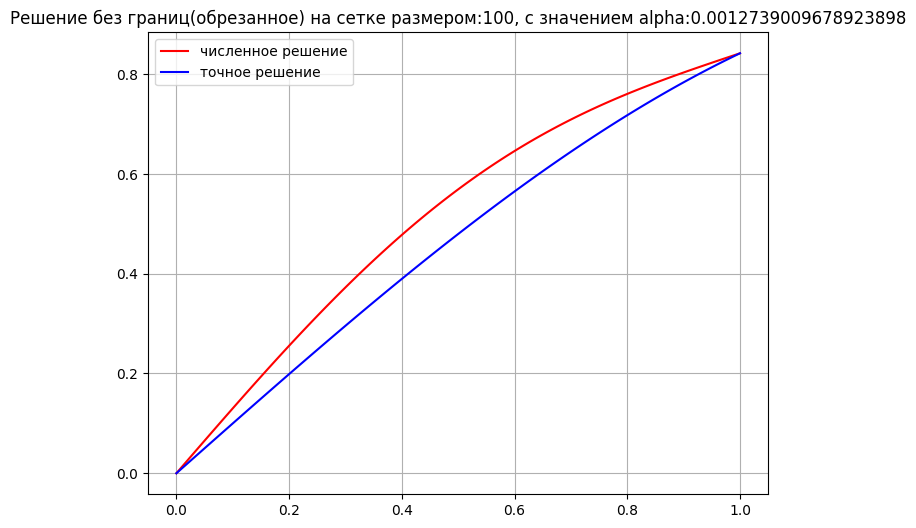

In [505]:
plt.figure(figsize=(8, 6))
plt.title(f'Решение без границ(обрезанное) на сетке размером:{n}, с значением alpha:{alpha}')
plt.plot(x,qq,label = 'численное решение',color = 'red')
plt.plot(x,real_one,label = 'точное решение',color = 'blue')
plt.grid(True)
plt.legend()

In [537]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [538]:
def test(alpha: float):
    a,b = 0,1
    n = 100
    t = np.linspace(a,b,n)
    s = np.linspace(a,b,n)
    x = np.linspace(a,b,n)
    right_side = np.full(n,np.NAN)
    left_side = np.full((n,n),np.NAN)
    real_one = np.full(n,np.NAN)
    A = np.ones(n)
    A[0],A[n - 1] = 0.5,0.5
    h = (b - a) / (n - 1)
    np.random.seed(42)
    eps = 0.1
    q = 1
    p = 1

    for i in range(n):
        real_one[i] = np.sin(x[i])
    
    def G_star_ts(t: float,s: float):
        if s > t:
            return (1 / (4 * (-np.exp(4) + 2 * np.exp(2) - 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t + np.exp(4 - t - s) * s + np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t + np.exp(s + t) * s + np.exp(s + t) * t - np.exp(2 + s + t) * s - np.exp(2 + s + t) * t - np.exp(s - t) * s + np.exp(s - t) * t - np.exp(t + 4 - s) * s + np.exp(t + 4 - s) * t - np.exp(2 - t - s) * s - np.exp(2 - t - s) * t - np.exp(2 + t - s) + np.exp(4 - t - s) - 3 * np.exp(2 - t + s) - np.exp(s + t) + 3 * np.exp(2 + s + t) + np.exp(s - t) - np.exp(t + 4 - s) + np.exp(2 - t - s))
        else:
            return (1 / (4 * (np.exp(4) - 2 * np.exp(2) + 1))) * (np.exp(2 + t - s) * s - np.exp(2 + t - s) * t - np.exp(4 - t - s) * s - np.exp(4 - t - s) * t + np.exp(2 - t + s) * s - np.exp(2 - t + s) * t - np.exp(s + t) * s - np.exp(s + t) * t + np.exp(2 + s + t) * s + np.exp(2 + s + t) * t - np.exp(4 - t + s) * s + np.exp(4 - t + s) * t - np.exp(t - s) * s + np.exp(t - s) * t + np.exp(2 - t - s) * s + np.exp(2 - t - s) * t + 3 * np.exp(2 + t - s) - np.exp(4 - t - s) + np.exp(2 - t + s) + np.exp(s + t) - 3 * np.exp(2 + s + t) + np.exp(4 - t + s) - np.exp(t - s) - np.exp(2 - t - s))
    
    def phi(s: float) -> float:
    # return ((1/2) * (np.exp(s-1) - np.exp(-s + 1))) * np.exp(1) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
        return ((0.5) * (np.exp(s-1) - np.exp(-s + 1)) * np.exp(1)) / (np.exp(2) - 1)

    def theta(s: float) -> float:
    # return ((1/2) * (np.exp(s) - np.exp(-s))) / (np.exp(s) * np.exp(-s+1) - np.exp(-s) * np.exp(s-1))
        return ((0.5) * (np.exp(s) - np.exp(-s)) * np.exp(1)) / (np.exp(2) - 1)

    def y(x: float,eps: float) -> float:
        return (1 + eps * (2 * np.random.uniform(0,1,1)[0] - 1)) * (-0.5 * (np.sin(x) * np.exp(2) + np.sin(1) * np.exp(-x + 1) - np.sin(1) * np.exp(x + 1) - np.sin(x))) / (np.exp(2) - 1)
    
    def y_star1(t: float):
        return (1 / (-2 * np.exp(4) + 4 * np.exp(2) - 2)) * (np.sin(1) * (1 + t) * np.exp(-1 * t + 1) + np.sin(1) * (4 * np.exp(2) * t - 2 * np.exp(4) * t + t * np.exp(1 + t) - t * np.exp(3 - t) - t * np.exp(t + 3) - 2 * t - np.exp(1 + t) - 3 * np.exp(3 - t) + 3 * np.exp(t + 3)))
    
    def y_star(t: float) -> float:
        sum = 0
        for i in range(1, n-1):
            if x[i] < t:
                sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y(x[i],eps)
                # sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y(x[i])
            else:
                # sum += phi(t) * (np.exp(x[i]) - np.exp(-x[i])) * y(x[i])
                sum += theta(t) * (np.exp(x[i] - 1) - np.exp(-x[i] + 1)) * y(x[i],eps)
        sum *= 2
        sum += phi(t) * (np.exp(x[0]) - np.exp(-x[0])) * y(x[0],eps) + \
            theta(t) * (np.exp(x[n-1] - 1) - np.exp(-x[n-1] + 1)) * y(x[n-1],eps)
        return (h/2) * sum

    for i in range(n):
        right_side[i] = y_star(t[i]) - y_star1(t[i])

    for i in range(1,n-1):
        for j in range(n):
            left_side[i,j] = h * A[j] * G_star_ts(t[i],s[j])

    for i in range(1,n-1):
        left_side[i,i] = (alpha * q - (2 * alpha * p) / (h ** 2)) + h * G_star_ts(t[i],s[i]) * A[i]
        left_side[i,i-1] = ((alpha * p) / (h ** 2)) + h * G_star_ts(t[i],s[i]) * A[i]
        left_side[i,i+1] = ((alpha * p) / (h ** 2)) + h * G_star_ts(t[i],s[i]) * A[i]
    left_side[0,1:] = 0
    left_side[0,0] = 1
    left_side[-1,0:-1] = 0
    left_side[-1,-1] = 1
    right_side[0] = 0
    right_side[-1] = 0

    def norma_L2(f: np.ndarray):
        sum = 0
        for i in range(1, n-1):
            sum += (np.abs(f[i]) ** 2)
        sum *= 2
        sum += (np.abs(f[0]) ** 2) + (np.abs(f[n-1]) ** 2)
        return np.sqrt((h/2) * sum)

    qq = np.linalg.solve(left_side,right_side) + t * np.sin(1)
    # return np.abs(norma_L2(np.linalg.solve(left_side,right_side)) - 1.05 * R)
    return np.abs(norma_L2(qq - real_one))

In [539]:
res = minimize(test, 1e-5, method='nelder-mead', options={'xatol': 1e-5, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.001272
         Iterations: 10
         Function evaluations: 20


In [540]:
res

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.0012724513343057122
             x: [ 1.500e-05]
           nit: 10
          nfev: 20
 final_simplex: (array([[ 1.500e-05],
                       [ 1.506e-05]]), array([ 1.272e-03,  1.274e-03]))

In [541]:
res.x[0]

1.5000000000000012e-05

In [543]:
import pandas as pd

# Создаем пустой датафрейм
df = pd.DataFrame(index=['alpha_opt', 'delta'], columns=['eps=0.001 p=0.001', 'eps=0.001 p=0.5', 'eps=0.001 p=1',  'eps=0.01 p=0.001', 'eps=0.01 p=0.5', 'eps=0.01 p=1', 'eps=0.05 p=0.001', 'eps=0.05 p=0.5', 'eps=0.05 p=1', 'eps=0.1 p=0.001', 'eps=0.1 p=0.5', 'eps=0.1 p=1'])


In [544]:
df

,eps=0.001 p=0.001,eps=0.001 p=0.5,eps=0.001 p=1,eps=0.01 p=0.001,eps=0.01 p=0.5,eps=0.01 p=1,eps=0.05 p=0.001,eps=0.05 p=0.5,eps=0.05 p=1,eps=0.1 p=0.001,eps=0.1 p=0.5,eps=0.1 p=1
alpha_opt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [551]:
df.iat[0, 0] = 0.00013750000000000025
df.iat[0, 1] = 1e-05
df.iat[0, 2] = -4.999999999999876e-07
df.iat[0, 3] = 0.000569500000000001
df.iat[0, 4] = 3.0000000000000085e-06
df.iat[0, 5] = 2.0000000000000097e-06
df.iat[0, 6] = 0.0014895000000000028
df.iat[0, 7] = 1.6500000000000018e-05
df.iat[0, 8] = 8.000000000000003e-06
df.iat[0, 9] = 0.002265500000000004
df.iat[0, 10] = 3.075000000000005e-05
df.iat[0, 11] = 1.5000000000000012e-05

In [552]:
df.iat[1, 0] = 0.0018808013451401665
df.iat[1, 1] = 0.001032
df.iat[1, 2] = 0.0007822817468400541
df.iat[1, 3] = 0.005075320043532055
df.iat[1, 4] = 0.0012739009678923898
df.iat[1, 5] = 0.0015931411945457057
df.iat[1, 6] = 0.009921516035213455
df.iat[1, 7] = 0.0011513465227797654
df.iat[1, 8] = 0.0011768455793910607
df.iat[1, 9] = 0.013197261689333556
df.iat[1, 10] = 0.0012489081894717974
df.iat[1, 11] = 0.0012724513343057122

In [553]:
df

,eps=0.001 p=0.001,eps=0.001 p=0.5,eps=0.001 p=1,eps=0.01 p=0.001,eps=0.01 p=0.5,eps=0.01 p=1,eps=0.05 p=0.001,eps=0.05 p=0.5,eps=0.05 p=1,eps=0.1 p=0.001,eps=0.1 p=0.5,eps=0.1 p=1
alpha_opt,0.000138,0.00001,-0.0,0.00057,0.000003,0.000002,0.00149,0.000017,0.000008,0.002266,0.000031,0.000015
delta,0.001881,0.001032,0.000782,0.005075,0.001274,0.001593,0.009922,0.001151,0.001177,0.013197,0.001249,0.001272
